# Project: Employee Risk Prediction

## Author: Manish Kumar Chintha

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from patsy import dmatrices
import sklearn
import seaborn as sns

In [2]:
dataframe=pd.read_csv("Data.csv")

In [3]:
dataframe.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [4]:
dataframe.loc[:, 'NumCompaniesWorked'].mean()


2.6931972789115646

In [5]:
names = dataframe.columns.values 
print(names)

['Age' 'Attrition' 'Department' 'DistanceFromHome' 'Education'
 'EducationField' 'EnvironmentSatisfaction' 'JobSatisfaction'
 'MaritalStatus' 'MonthlyIncome' 'NumCompaniesWorked' 'WorkLifeBalance'
 'YearsAtCompany']


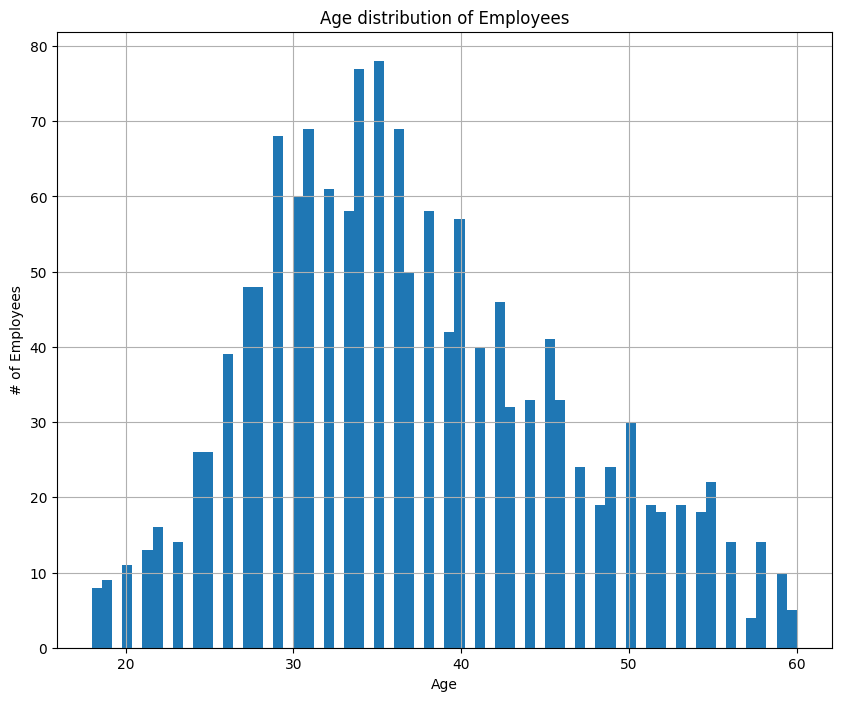

In [6]:
# histogram for age
plt.figure(figsize=(10,8))
dataframe['Age'].hist(bins=70)
plt.title("Age distribution of Employees")
plt.xlabel("Age")
plt.ylabel("# of Employees")
plt.show()

C:\Users\Manish\AppData\Local\Temp\ipykernel_6788\519728794.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major',axis='y')


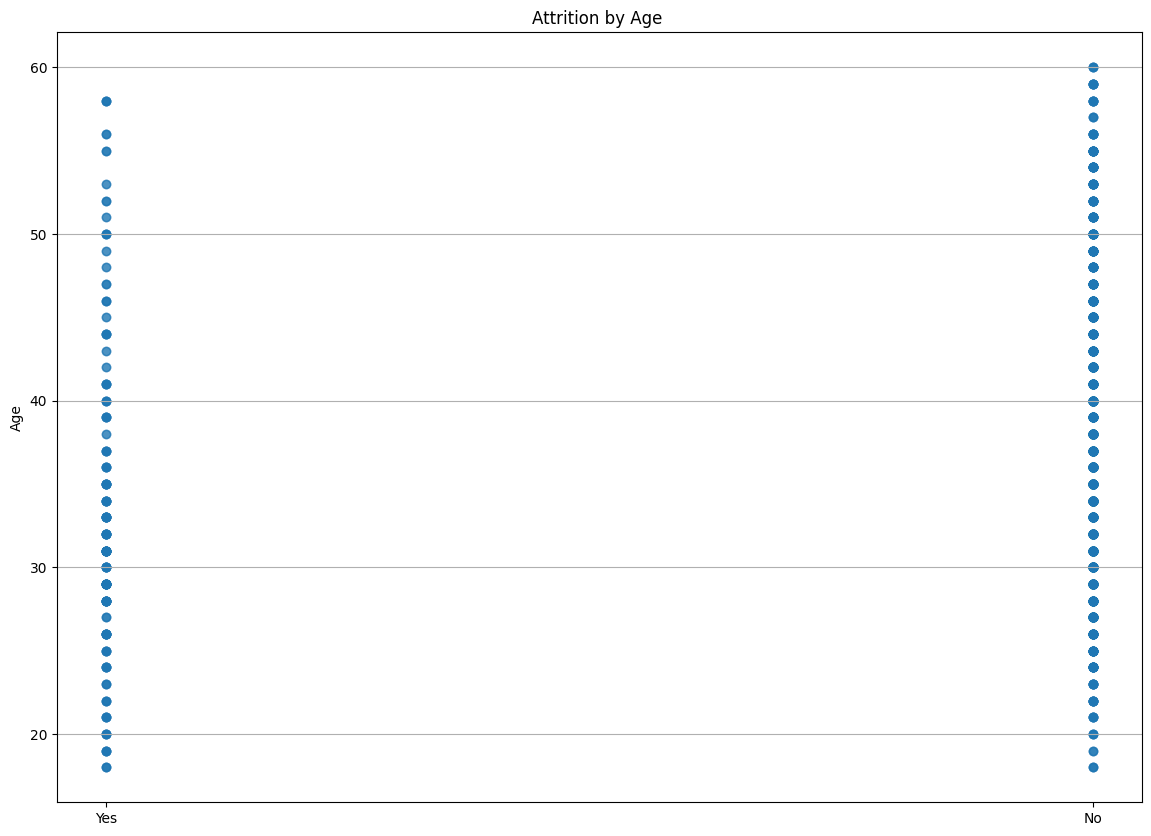

In [7]:
# explore data for Attrition by Age
plt.figure(figsize=(14,10))
plt.scatter(dataframe.Attrition,dataframe.Age, alpha=.55)
plt.title("Attrition by Age ")
plt.ylabel("Age")
plt.grid(b=True, which='major',axis='y')
plt.show()

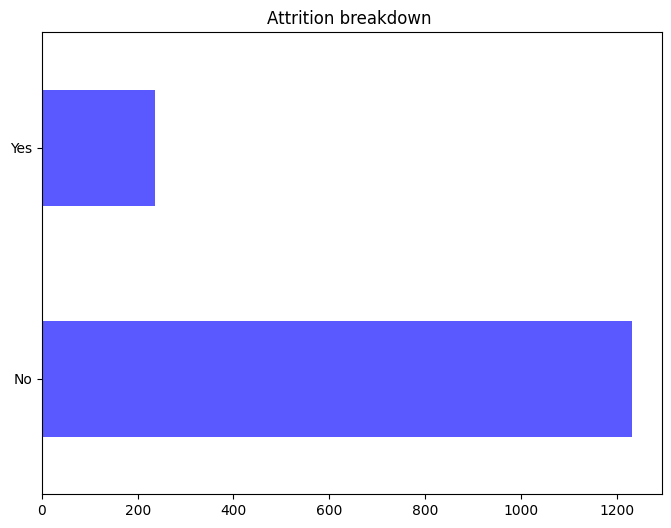

In [8]:
# explore data for Left employees breakdown
plt.figure(figsize=(8,6))
dataframe.Attrition.value_counts().plot(kind='barh',color='blue',alpha=.65)
plt.title("Attrition breakdown ")
plt.show()

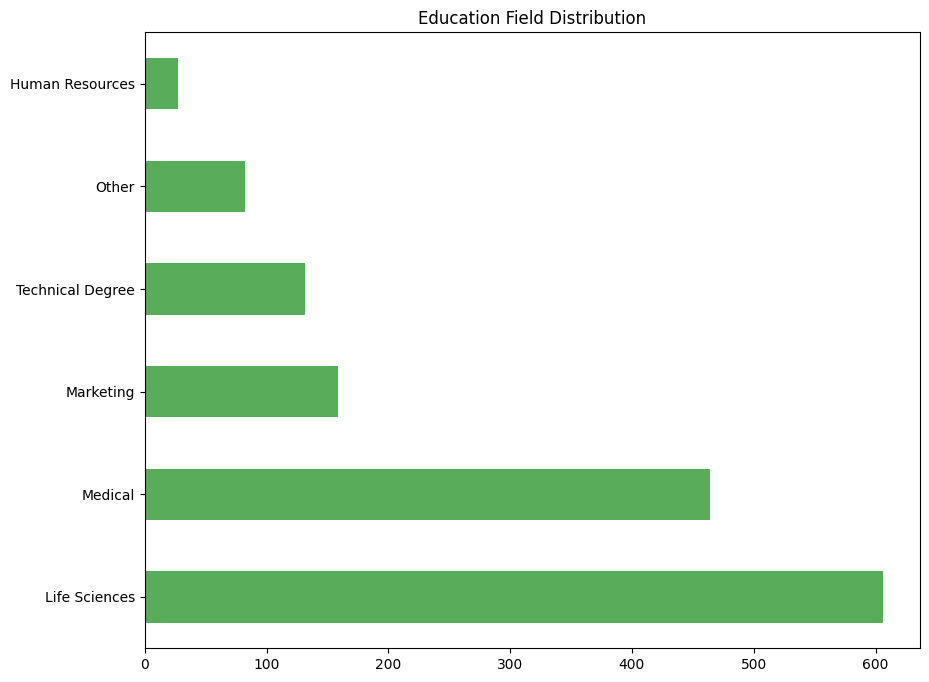

In [9]:
# explore data for Education Field distribution
plt.figure(figsize=(10,8))
dataframe.EducationField.value_counts().plot(kind='barh',color='g',alpha=.65)
plt.title("Education Field Distribution")
plt.show()

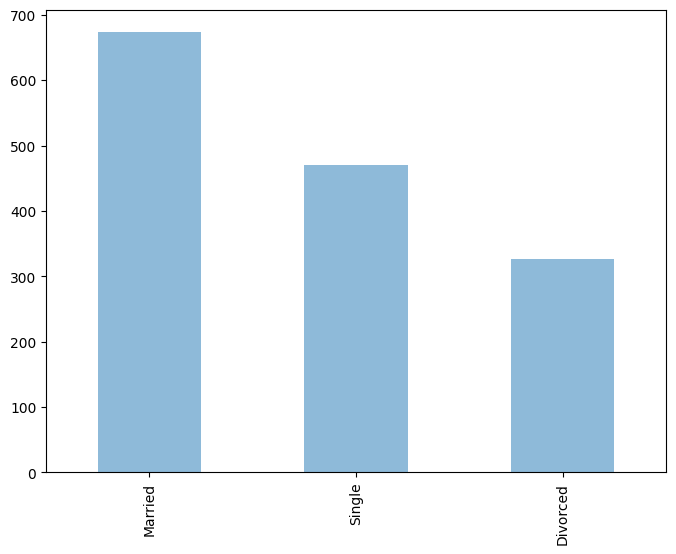

In [10]:
# explore data for Marital Status
plt.figure(figsize=(8,6))
dataframe.MaritalStatus.value_counts().plot(kind='bar',alpha=.5)
plt.show()

In [11]:
dataframe.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [12]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [13]:
dataframe.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [14]:
dataframe.std()

C:\Users\Manish\AppData\Local\Temp\ipykernel_6788\3401367348.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataframe.std()


Age                           9.135373
DistanceFromHome              8.106864
Education                     1.024165
EnvironmentSatisfaction       1.093082
JobSatisfaction               1.102846
MonthlyIncome              4707.956783
NumCompaniesWorked            2.498009
WorkLifeBalance               0.706476
YearsAtCompany                6.126525
dtype: float64

In [15]:
dataframe['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [16]:
dataframe['Attrition'].dtypes

dtype('O')

In [17]:
dataframe['Attrition'].replace('Yes',1, inplace=True)
dataframe['Attrition'].replace('No',0, inplace=True)

In [18]:
dataframe.head(10)

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,0,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,1,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,0,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,0,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
5,32,0,Research & Development,2,2,Life Sciences,4,4,Single,3068,0,2,7
6,59,0,Research & Development,3,3,Medical,3,1,Married,2670,4,2,1
7,30,0,Research & Development,24,1,Life Sciences,4,3,Divorced,2693,1,3,1
8,38,0,Research & Development,23,3,Life Sciences,4,3,Single,9526,0,3,9
9,36,0,Research & Development,27,3,Medical,3,3,Married,5237,6,2,7


In [19]:
# building up a logistic regression model
X = dataframe.drop(['Attrition'],axis=1)
X.head()
Y = dataframe['Attrition']
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [20]:
dataframe['EducationField'].replace('Life Sciences',1, inplace=True)
dataframe['EducationField'].replace('Medical',2, inplace=True)
dataframe['EducationField'].replace('Marketing', 3, inplace=True)
dataframe['EducationField'].replace('Other',4, inplace=True)
dataframe['EducationField'].replace('Technical Degree',5, inplace=True)
dataframe['EducationField'].replace('Human Resources', 6, inplace=True)

In [21]:
dataframe['EducationField'].value_counts()

1    606
2    464
3    159
5    132
4     82
6     27
Name: EducationField, dtype: int64

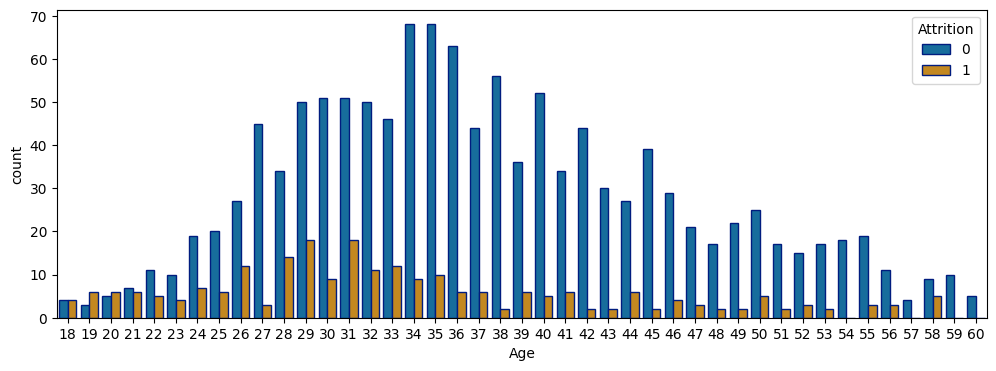

In [22]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

#ax = axis
sns.countplot(x='Age', hue='Attrition', data = dataframe, palette="colorblind", ax = ax,  edgecolor=sns.color_palette("dark", n_colors = 1));


In [23]:
dataframe['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [24]:
dataframe['Department'].replace('Research & Development',1, inplace=True)
dataframe['Department'].replace('Sales',2, inplace=True)
dataframe['Department'].replace('Human Resources', 3, inplace=True)

In [25]:
dataframe['Department'].value_counts()

1    961
2    446
3     63
Name: Department, dtype: int64

In [26]:
dataframe['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [27]:
dataframe['MaritalStatus'].replace('Married',1, inplace=True)
dataframe['MaritalStatus'].replace('Single',2, inplace=True)
dataframe['MaritalStatus'].replace('Divorced',3, inplace=True)

In [28]:
dataframe['MaritalStatus'].value_counts()

1    673
2    470
3    327
Name: MaritalStatus, dtype: int64

In [30]:
#x.columns

In [31]:
y=dataframe['Attrition']

In [32]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [33]:
y, x = dmatrices('Attrition ~ Age + Department + \
                  DistanceFromHome + Education + EducationField + YearsAtCompany',
                  dataframe, return_type="dataframe")
print (x.columns)

Index(['Intercept', 'Age', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'YearsAtCompany'],
      dtype='object')


In [34]:
dataframe.isnull().values.any()

False

In [35]:
for column in dataframe.columns:
    if dataframe[column].dtype == object:
        print(str(column) + ' : ' + str(dataframe[column].unique()))
        print(dataframe[column].value_counts())
        print("_________________________________________________________________")

In [36]:
#Get the correlation of the columns
dataframe.corr()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
Age,1.000000,-0.159205,-0.007652,-0.001686,0.208034,-0.028312,0.010146,-0.004892,-0.035466,0.497855,0.299635,-0.021490,0.311309
Attrition,-0.159205,1.000000,0.077351,0.077924,-0.031373,0.077232,-0.103369,-0.103481,0.011195,-0.159840,0.043494,-0.063939,-0.134392
Department,-0.007652,0.077351,1.000000,0.002196,0.019636,0.243641,-0.026110,-0.006231,-0.030818,0.056573,-0.011261,0.075507,0.029752
DistanceFromHome,-0.001686,0.077924,0.002196,1.000000,0.021042,0.004815,-0.016075,-0.003669,-0.021916,-0.017014,-0.029251,-0.026556,0.009508
Education,0.208034,-0.031373,0.019636,0.021042,1.000000,0.018328,-0.027128,-0.011296,-0.000107,0.094961,0.126317,0.009819,0.069114
EducationField,-0.028312,0.077232,0.243641,0.004815,0.018328,1.000000,0.045874,-0.044336,-0.023572,-0.013640,-0.002864,0.041927,-0.018000
EnvironmentSatisfaction,0.010146,-0.103369,-0.026110,-0.016075,-0.027128,0.045874,1.000000,-0.006784,0.022628,-0.006259,0.012594,0.027627,0.001458
JobSatisfaction,-0.004892,-0.103481,-0.006231,-0.003669,-0.011296,-0.044336,-0.006784,1.000000,-0.001494,-0.007157,-0.055699,-0.019459,-0.003803
MaritalStatus,-0.035466,0.011195,-0.030818,-0.021916,-0.000107,-0.023572,0.022628,-0.001494,1.000000,-0.018836,0.031652,-0.000751,-0.014779
MonthlyIncome,0.497855,-0.159840,0.056573,-0.017014,0.094961,-0.013640,-0.006259,-0.007157,-0.018836,1.000000,0.149515,0.030683,0.514285


<AxesSubplot: >

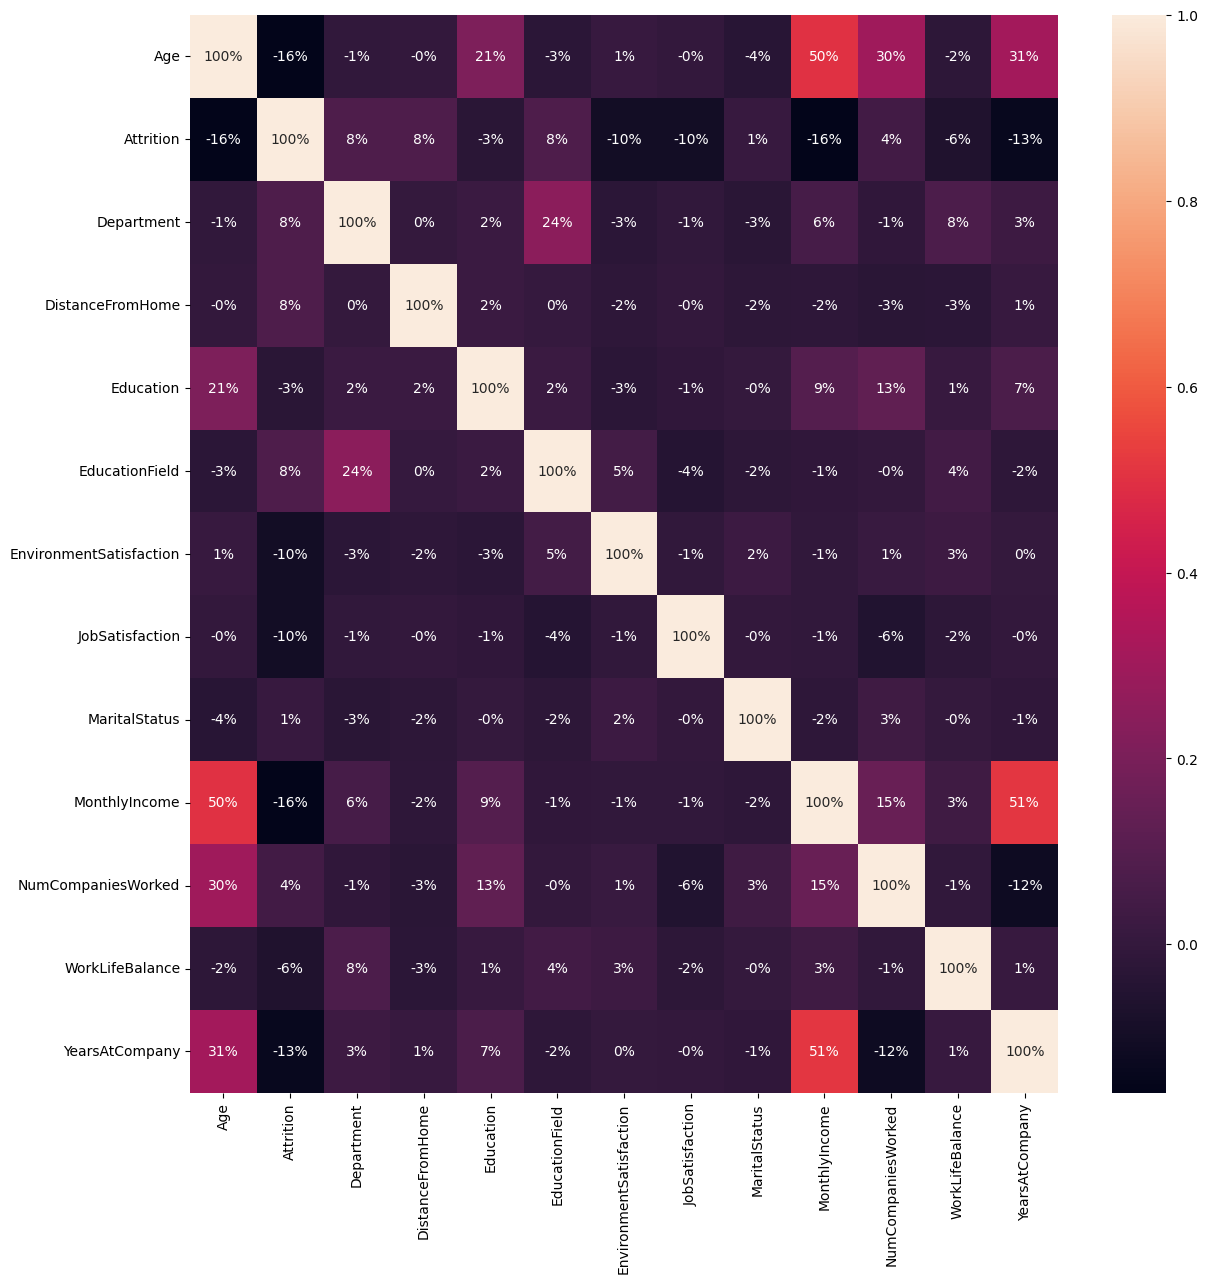

In [37]:
plt.figure(figsize=(14,14))  #14in by 14in
sns.heatmap(dataframe.corr(), annot=True, fmt='.0%')

In [38]:
from sklearn.preprocessing import LabelEncoder

for column in dataframe.columns:
        if dataframe[column].dtype == np.number:
            continue
        dataframe[column] = LabelEncoder().fit_transform(dataframe[column])

C:\Users\Manish\AppData\Local\Temp\ipykernel_6788\1856778061.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dataframe[column].dtype == np.number:


In [39]:
dataframe['Age_Years'] = dataframe['Age']
#Remove the first column called age 
dataframe = dataframe.drop('Age', axis = 1)
#Show the dataframe
dataframe


,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Age_Years
0,1,1,0,1,0,1,3,1,809,8,0,6,23
1,0,0,7,0,0,2,1,0,682,1,2,10,31
2,1,0,1,1,3,3,2,1,62,6,2,0,19
3,0,0,2,3,0,3,2,0,313,1,2,8,15
4,0,0,1,0,1,0,1,0,399,9,2,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,0,22,1,1,2,3,0,210,4,2,5,18
1466,0,0,5,0,1,3,0,0,1070,4,2,7,21
1467,0,0,3,2,0,1,1,0,821,1,2,6,9
1468,0,1,1,2,1,3,1,0,730,2,1,9,31


In [40]:
X = dataframe.iloc[:, 1:dataframe.shape[1]].values 
Y = dataframe.iloc[:, 0].values

In [41]:
y = np.ravel(y)

In [42]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model = model.fit(x, y)

# check the accuracy on the training set
model.score(x, y)

0.8408163265306122

In [43]:
y.mean()

0.16122448979591836

In [44]:
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y, test_size=0.3, random_state=0)
model2=LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression()

In [45]:
predicted= model2.predict(X_test)
print (predicted)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.

In [46]:
probs = model2.predict_proba(X_test)
print (probs)

[[0.86179623 0.13820377]
 [0.80754592 0.19245408]
 [0.74123933 0.25876067]
 [0.83441337 0.16558663]
 [0.73499936 0.26500064]
 [0.79097742 0.20902258]
 [0.85615197 0.14384803]
 [0.8569967  0.1430033 ]
 [0.96699057 0.03300943]
 [0.93685209 0.06314791]
 [0.95099277 0.04900723]
 [0.83101548 0.16898452]
 [0.86296556 0.13703444]
 [0.86581193 0.13418807]
 [0.88750603 0.11249397]
 [0.88892617 0.11107383]
 [0.88569726 0.11430274]
 [0.78516583 0.21483417]
 [0.7979449  0.2020551 ]
 [0.88511304 0.11488696]
 [0.70651591 0.29348409]
 [0.94676693 0.05323307]
 [0.86736254 0.13263746]
 [0.84276452 0.15723548]
 [0.6033684  0.3966316 ]
 [0.811292   0.188708  ]
 [0.9181373  0.0818627 ]
 [0.93285522 0.06714478]
 [0.68230754 0.31769246]
 [0.87027138 0.12972862]
 [0.87266385 0.12733615]
 [0.76968738 0.23031262]
 [0.86435773 0.13564227]
 [0.9575888  0.0424112 ]
 [0.84461486 0.15538514]
 [0.86719349 0.13280651]
 [0.90465982 0.09534018]
 [0.68936424 0.31063576]
 [0.90703617 0.09296383]
 [0.80663475 0.19336525]


In [47]:
from sklearn import metrics

print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))

0.8435374149659864
0.6502502887947632


In [48]:
print (metrics.confusion_matrix(y_test, predicted))
print (metrics.classification_report(y_test, predicted))

[[371   0]
 [ 69   1]]
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       371
         1.0       1.00      0.01      0.03        70

    accuracy                           0.84       441
   macro avg       0.92      0.51      0.47       441
weighted avg       0.87      0.84      0.77       441



In [49]:
print (X_train)

      Intercept   Age  Department  DistanceFromHome  Education  \
338         1.0  30.0         2.0               5.0        3.0   
363         1.0  33.0         2.0               5.0        3.0   
759         1.0  45.0         3.0              24.0        4.0   
793         1.0  28.0         1.0              15.0        2.0   
581         1.0  30.0         1.0               1.0        3.0   
...         ...   ...         ...               ...        ...   
763         1.0  34.0         2.0              10.0        4.0   
835         1.0  35.0         3.0               8.0        4.0   
1216        1.0  43.0         2.0               2.0        3.0   
559         1.0  38.0         1.0               2.0        5.0   
684         1.0  40.0         2.0              10.0        4.0   

      EducationField  YearsAtCompany  
338              3.0            10.0  
363              3.0             1.0  
759              2.0             6.0  
793              1.0             4.0  
581         

In [50]:
print(model.predict_proba(X_train))

[[0.82541945 0.17458055]
 [0.74855525 0.25144475]
 [0.77002422 0.22997578]
 ...
 [0.9063644  0.0936356 ]
 [0.85148851 0.14851149]
 [0.77442692 0.22557308]]


In [51]:

#add random values to KK according to the parameters mentioned above to check the proabily of attrition of the employee
kk=[[1.0, 25.0, 1.0, 500.0, 3.0, 24.0, 1.0]]
arr=model.predict_proba(kk)
print(model.predict_proba(kk))

[[6.78962103e-07 9.99999321e-01]]


C:\Users\Manish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Manish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
